<a href="https://colab.research.google.com/github/zkatemor/audio-classification/blob/main/audio_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Классификация аудио/звуков (Python)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import glob
from scipy.io import wavfile

In [ ]:
data_files = glob.glob("/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/**/*.wav")
data_files[:5]

['/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/human/human_00027.wav',
 '/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/human/human_00023.wav',
 '/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/human/human_00037.wav',
 '/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/human/human_00004.wav',
 '/content/drive/My Drive/Colab Notebooks/audio/temp_data/Training_Data/human/human_00029.wav']

In [90]:
dataset = [{'path': path, 'label': path.split('/')[8]} for path in data_files]
df = pd.DataFrame.from_dict(dataset)

In [91]:
# Add a column to store the data read from each wavfile...
df['x'] = df['path'].apply(lambda x: wavfile.read(x)[1])
print(df.head())

                                                path  ...                                                  x
0  /content/drive/My Drive/Colab Notebooks/audio/...  ...  [-18, -14, -15, -8, -7, 4, 17, 19, -9, -34, -3...
1  /content/drive/My Drive/Colab Notebooks/audio/...  ...  [113, 191, 151, 158, 146, 153, 140, 134, 124, ...
2  /content/drive/My Drive/Colab Notebooks/audio/...  ...  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  /content/drive/My Drive/Colab Notebooks/audio/...  ...  [-20, -13, -11, -6, -2, 5, 3, 2, 5, 11, 11, 13...
4  /content/drive/My Drive/Colab Notebooks/audio/...  ...  [-1, -1, -1, -1, -1, -1, 3, 3, 3, 3, 3, -1, -1...

[5 rows x 3 columns]


In [ ]:
# Import dependencies
from scipy.io import wavfile
from sklearn.svm import SVC
from scipy.signal import spectrogram
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pathlib import Path

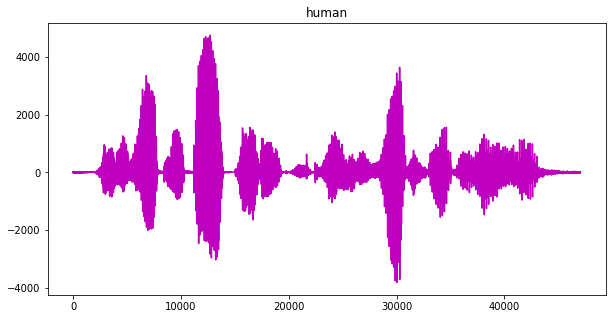

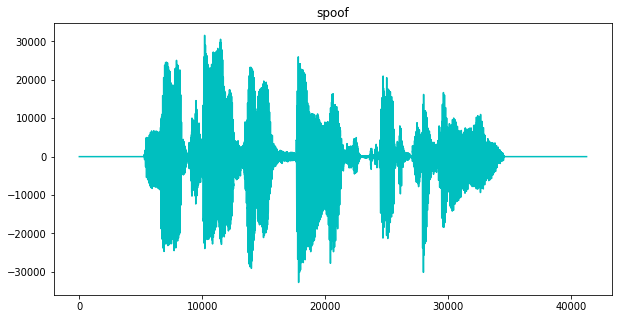

In [ ]:
#Choosing one of the each samples form each catogery 
human = df[df['label'] == 'human' ].sample(1)
spoof = df[df['label'] == 'spoof' ].sample(1)

# Plot the three samples onto 2 different figures
plt.figure(1, figsize=(10,5))
plt.title('human')
plt.plot(human['x'].values[0], c='m')

plt.figure(2, figsize=(10, 5))
plt.title('spoof')
plt.plot(spoof['x'].values[0], c='c')

In [ ]:
#make the lenght of all audio files same by repeating audio file contents till its length is equal to max length audio file
max_length = max(df['x'].apply(len))

def repeat_to_length(arr, length):
    """Repeats the numpy 1D array to given length, and makes datatype float"""
    result = np.empty((length, ), dtype = np.float32)
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

df['x'] = df['x'].apply(repeat_to_length, length=max_length)
df.head()

,path,label,x
0,/content/drive/My Drive/Colab Notebooks/audio/...,human,"[-18.0, -14.0, -15.0, -8.0, -7.0, 4.0, 17.0, 1..."
1,/content/drive/My Drive/Colab Notebooks/audio/...,human,"[113.0, 191.0, 151.0, 158.0, 146.0, 153.0, 140..."
2,/content/drive/My Drive/Colab Notebooks/audio/...,human,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,/content/drive/My Drive/Colab Notebooks/audio/...,human,"[-20.0, -13.0, -11.0, -6.0, -2.0, 5.0, 3.0, 2...."
4,/content/drive/My Drive/Colab Notebooks/audio/...,human,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 3.0, 3.0,..."


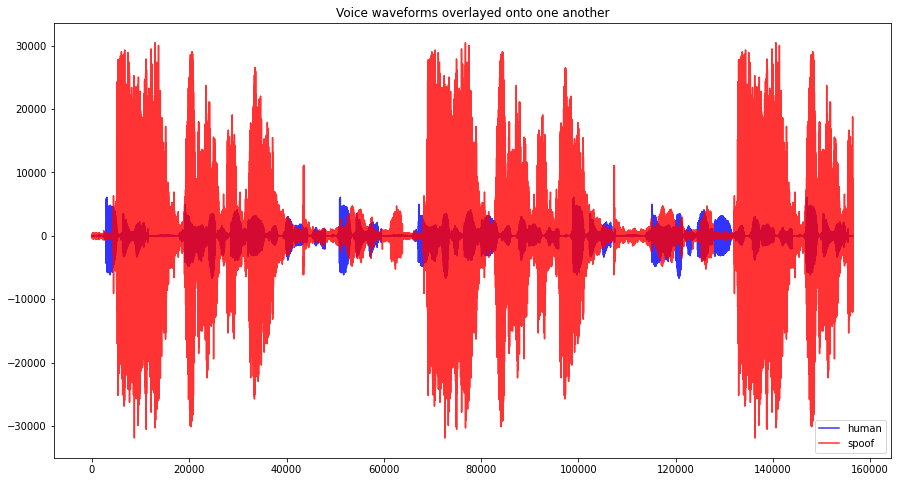

In [ ]:
# Collect one sample from each of the 2 classes and plot their waveforms
human = df[df['label'] == 'human' ].sample(1)
spoof = df[df['label'] == 'spoof' ].sample(1)

plt.figure(1, figsize=(15,8))
plt.plot(human['x'].values[0], c='b', label='human', alpha=0.8)
plt.plot(spoof['x'].values[0], c='r', label='spoof', alpha=0.8)

plt.title('Voice waveforms overlayed onto one another')
plt.legend(loc='lower right')
plt.savefig('temp.png')

Text(0.5, 0, 'Time [sec]')

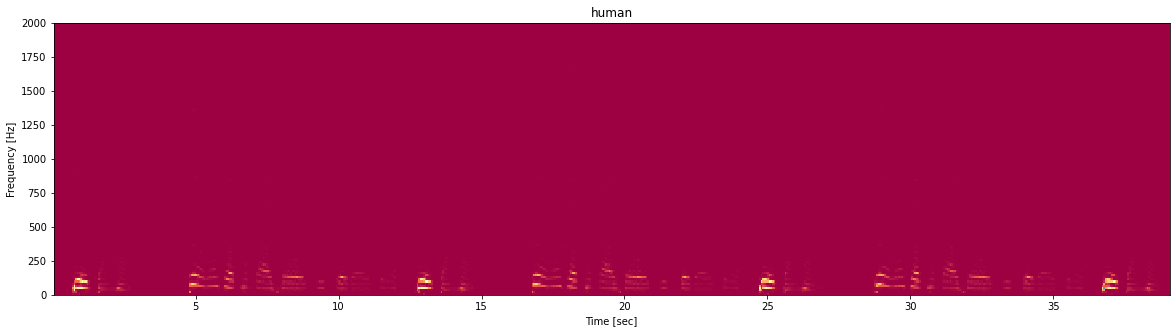

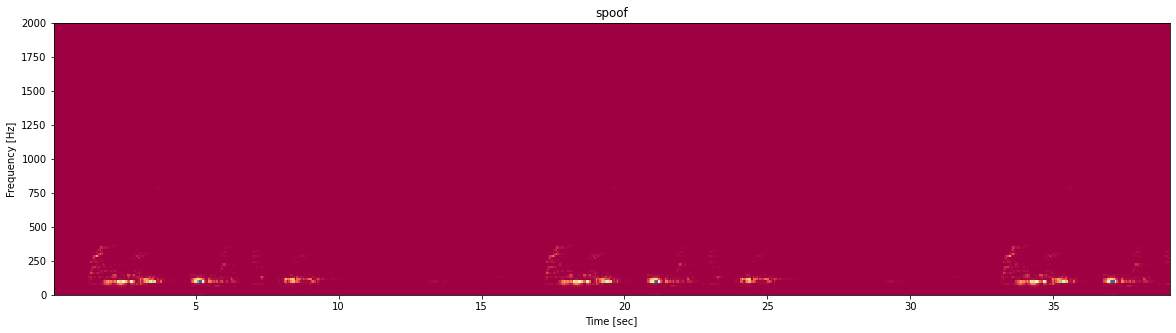

In [ ]:
fs = 4000
f_human, t_human, Sxx_human = spectrogram(human['x'].values[0], 4000)
plt.figure(1, figsize=(20,5))
plt.title('human')
plt.pcolormesh(t_human, f_human, Sxx_human, cmap='Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

f_spoof, t_spoof, Sxx_spoof = spectrogram(spoof['x'].values[0], 4000)
plt.figure(2, figsize=(20, 5))
plt.title('spoof')
plt.pcolormesh(t_spoof, f_spoof, Sxx_spoof, cmap='Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [ ]:
# Put the data into numpy arrays. Most machine learning libraries use numpy arrays.
x = np.stack(df['x'].values, axis=0)
y = np.stack(df['label'].values, axis=0)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test, train_filenames, test_filenames = train_test_split(x, df['label'].values, df['path'].values, test_size=0.20)
print("x_train: {0}, x_test: {1}".format(x_train.shape, x_test.shape))

x_train: (81, 156480), x_test: (21, 156480)


In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Accuracy %.3f" % accuracy_score(y_test, predictions))

Accuracy 0.905


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1024,512,256,128,), 
                    max_iter=5000, verbose=True)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Accuracy %.3f" % accuracy_score(y_test, predictions))

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 0.00242567
Iteration 5, loss = 0.64949585
Iteration 6, loss = inf
Iteration 7, loss = 0.00298816
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = 0.00379297
Iteration 13, loss = 0.00392836
Iteration 14, loss = 0.00405741
Iteration 15, loss = inf
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy 0.476


## CNN

In [ ]:
import tensorflow as tf

In [ ]:
# Convert data to the format tf.keras expects
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(81, 156480, 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=9, activation='relu',
                input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.GlobalAvgPool1D())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Need to convert y labels into one-hot encoded vectors
y_train_int_categories, y_train_class_names = pd.factorize(y_train)
print("y_train_class_names: {0}".format(y_train_class_names))

y_test_int_categories, y_test_class_names = pd.factorize(y_test)
print("y_test_class_names: {0}".format(y_test_class_names))
y_train_hot = tf.keras.utils.to_categorical(y_train_int_categories)
y_test_hot = tf.keras.utils.to_categorical(y_test_int_categories)

hist = model.fit(x_train, y_train_hot, 
                 epochs=30,
                 validation_data=(x_test, y_test_hot))

y_train_class_names: ['spoof' 'human']
y_test_class_names: ['human' 'spoof']
Epoch 1/30
3/3 [==============================] - 3s 1s/step - loss: 0.6443 - accuracy: 0.5802 - val_loss: 4.5419 - val_accuracy: 0.5238
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 0.5941 - accuracy: 0.7037 - val_loss: 3.9200 - val_accuracy: 0.5238
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.5889 - accuracy: 0.7037 - val_loss: 3.7301 - val_accuracy: 0.5238
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 0.5834 - accuracy: 0.7284 - val_loss: 3.6277 - val_accuracy: 0.4762
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.5927 - accuracy: 0.7284 - val_loss: 3.3220 - val_accuracy: 0.5238
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 0.5543 - accuracy: 0.7531 - val_loss: 3.0315 - val_accuracy: 0.4762
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 0.5222 - accuracy: 0.7654 - val_

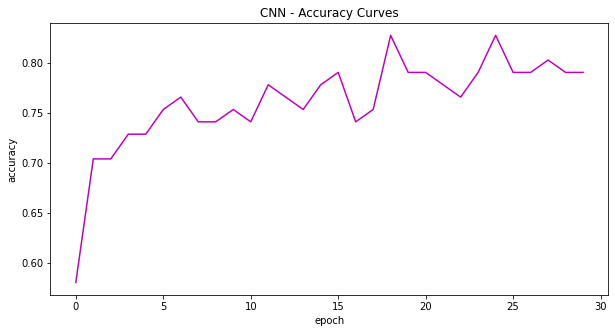

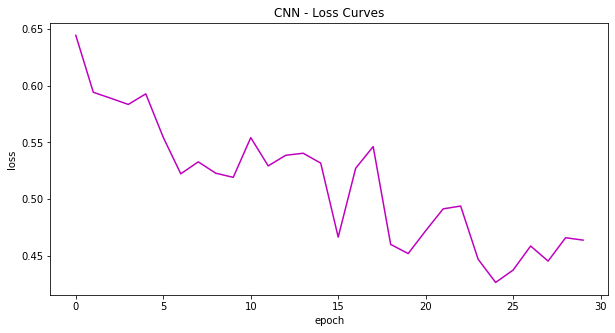

In [ ]:
accuracy = hist.history['accuracy']
loss = hist.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
import time
start = time.time()*1000
model.predict(x_test)
end = time.time()*1000
total = end - start
print("Total prediction time (milliseconds) for %d samples: %f" % (len(x_test), total))
print("Average prediction time for one example: %f" % (total/len(x_test)))

Total prediction time (milliseconds) for 21 samples: 660.056641
Average prediction time for one example: 31.431269


In [ ]:
# Save the train model
tf.keras.models.save_model(
    model,
    filepath='/content/drive/My Drive/Colab Notebooks/audio',
    overwrite=True,
    include_optimizer=True
)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/audio/assets
